# Trees and Gradient Boosting
## Rebecca Gartenberg, Sophie Jaro, Marc Gottlieb

In [ ]:
# Load Modules
import pandas as pd
import numpy as np
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve,GridSearchCV
from sklearn.model_selection import *

# Overview
This assignment demonstrates the application of gradient-boosted trees to regression problems. 
In this assignment, XGBoost, extreme Gradient Boosting, was applied to two datasets, California housing and Crime statistics. XGBoost is a Python library which implements the machine learning technique of gradient boosted trees. In our implementation, we used XGBoost to build a model. The model was then used to predict the label from a set of features. Some parameters within the XGBoost were specified in the model. GridSearch was used to choose optimal parameters for the best model.


In [ ]:
# Import California Housing Dataset
california_data = pd.read_csv (r'CaliforniaHousing.csv') # https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html
california_feature_names = ['Intercept','longitude','latitude', 'households', 'population', 'total bedrooms', 'total rooms', 'housing median age', 'median income']
display(california_data)

,longitude,latitude,households,population,total bedrooms,total rooms,housing median age,median income,median house value
0,-122.23,37.88,41,880,129,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409,741,349,1.8672,84700


In [ ]:
### Function to clean data

def clean_data(data):

  # Make data an array
  data_array = np.array(data)

  # Randomize the data array
  np.random.shuffle(data_array)
  p = len(data_array[1])-1

  # Separate into features and labels
  features = data_array[:,0:p]
  labels = data_array[:,p]

  # Normalize each data set features (normalize by subtracting the mean then dividing by variance per feature)
  #for i in range(0,len(features[1])):
  #  features[:,i] = ((features[:,i]-np.mean(features[:,i]))/np.sqrt(np.var(features[:,i])))

  # Normalize each data set features (normalize by subtracting the mean then dividing by variance per feature)
  #labels = ((labels-np.mean(labels))/np.sqrt(np.var(labels)))

  # Adding ones column to find intercept 
  ones_col = np.ones(len(features))
  features = np.insert(features, 0, ones_col, axis=1)
  
  return features, labels

# Cleaning data:
Both the features and labels of the California housing dataset were normalized so that the values for mean absolute error were between 0 and 1.

The crime in communities dataset had a large amount of features with some missing values and a non-numerical feature. In order to clean up this data and make it usable with our model, we removed the feature that contained words instead of numbers, and replaced the missing values with the mean value of that feature. The data was already normalized so we skipped that step when cleaning up the dataset.


In [ ]:
california_features, california_labels = clean_data(california_data)
X_train, X_test, y_train, y_test = train_test_split(california_features, california_labels, test_size=0.2, shuffle=True)

In [ ]:
# Grid Search Cross Validation
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {'max_depth': range(2, 10, 1), 
              'learning_rate': [0.1, 0.01, 0.05], 
              'gamma' : [0, 1.0, 5.0],
              'colsample_bytree' : [0.8],
              'subsample' : [0.8]}
grid_search = GridSearchCV(estimator=xg_reg, param_grid=parameters, cv = 10)
grid_search.fit(X_train, y_train)


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 1.0, 5.0],
                         'learning_rate': [0.1, 0

# Explanation of Grid Search
We used an article on towardsdatascience.com (https://towardsdatascience.com/fine-tuning-xgboost-in-python-like-a-boss-b4543ed8b1e)
  to guide our parameter selection process. We varied max_depth, learning rate, gamma, colsample_bytree, and subsample. The rest of XGBoosts regression parameters were left at defaults. max_depth is the maximum number of features used in each tree. In our GridSearch, it was varied from 2 to 10 features. In the California housing dataset, max_depth was 3. In the crime statistics dataset, max_depth was 3 too.  Learning rate, subsample, colsample_bytree, and gamma are all parameters to avoid overfitting. Learning rate was decremented from 0.1 to 0.01. A learning rate of 0.1 was selected in both models.  subsample is the percent of rows taken to build each tree. The subsample was set to be 0.8 to save time in our GridSearch. The colsample_bytree is the percent of columns taken by each tree. This prevents strong predictors from dominating every prediction. We selected 0.8 for this parameter as well. Finally, gamma is regularization parameter, specifically a minimum loss reduction required to make a further partition on a leaf node of the tree, which we varied from 0 to 1 to 5. Both data sets favored models with gamma = 0. 
With these parameters selected to create the optimal model, the model was then run repeatedly for increasing n_estimators. The MAE was plotted against the number of interactions for both the training and testing data. Next, the relative importance of the predictors was charted. 


In [ ]:
# Mean Absolute Error
y_pred = grid_search.predict(X_test)
MAE = np.sum(np.abs(y_test - y_pred))/len(y_pred)
print("MAE",  MAE)

MAE 0.2540726422907615


In [ ]:
# Baseline

y_mean = np.mean(y_train)
MAE = np.sum(np.abs(y_mean - y_test))/len(y_pred)
print('Baseline MAE =', MAE)

Baseline MAE = 0.7781116359331447


In [ ]:
# Best parameters determined by Gridsearch
grid_search.estimator

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# Computing Absolute Error for Number of Iterations
num_iterations = 200
NE = np.linspace(1,num_iterations,num_iterations)
MAE_vec = np.zeros(num_iterations)
MAE_vec_train = np.zeros(num_iterations)
for ne in NE:
  ne = int(ne)
  xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                            learning_rate = grid_search.estimator.learning_rate, 
                            max_depth = grid_search.estimator.max_depth,
                            gamma = grid_search.estimator.gamma,
                            colsample_bytree = grid_search.estimator.colsample_bytree,
                            subsample = grid_search.estimator.subsample,
                            n_estimators=ne)
  xg_reg.fit(X_train,y_train)
  y_pred = xg_reg.predict(X_test)
  y_pred_train = xg_reg.predict(X_train)
  MAE_vec[ne-1] = np.sum(np.abs(y_test - y_pred))/len(y_pred)
  MAE_vec_train[ne-1] = np.sum(np.abs(y_train - y_pred_train))/len(y_pred_train)

<Figure size 432x288 with 0 Axes>

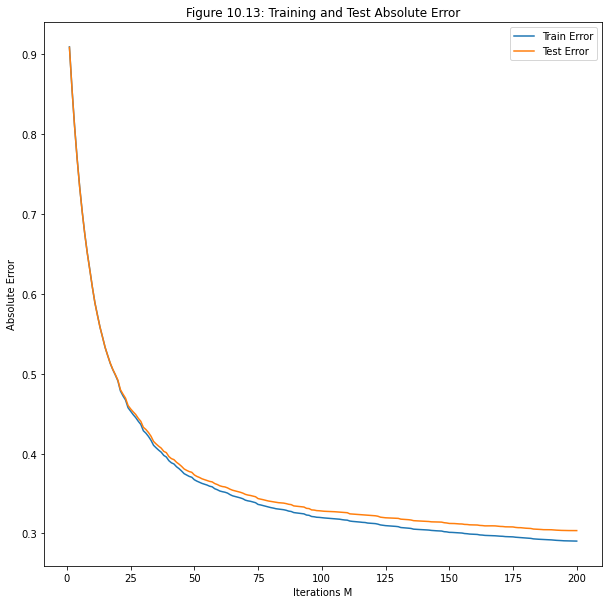

In [ ]:
# Plotting Training and Testing Absolute Error
plt.figure(1)
plt.figure(figsize=(10,10))
plt.plot(NE,MAE_vec_train)
plt.plot(NE,MAE_vec)

plt.title('Figure 10.13: Training and Test Absolute Error')
plt.xlabel('Iterations M')
plt.ylabel('Absolute Error')
plt.legend(['Train Error','Test Error'])
plt.show()

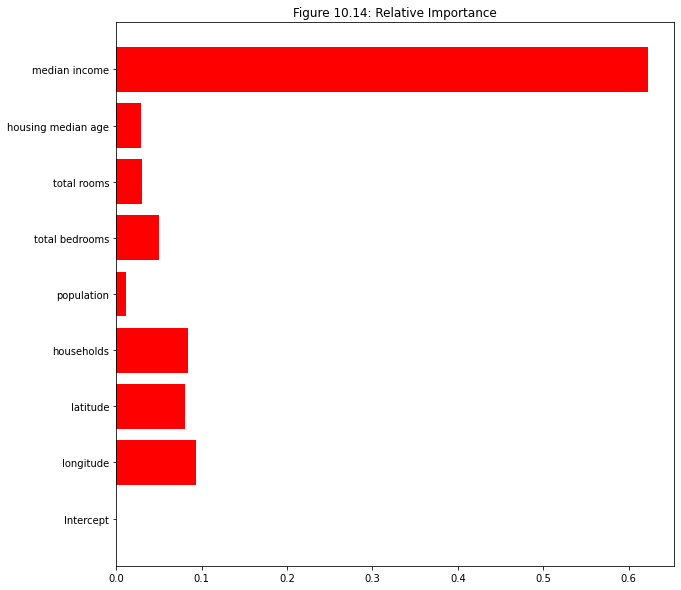

In [ ]:
# Plotting Relative Importance
plt.figure(figsize=(10,10))
plt.barh(california_feature_names, xg_reg.feature_importances_, color = 'red')
plt.title('Figure 10.14: Relative Importance')
plt.show()

# Results for California housing dataset

The California housing dataset contains 8 features which are used to predict median house value. After training a gradient boosted tree model on training data and predicting the labels of the testing data, the results are summarized below.

The mean absolute error was 0.254 (25.4% error) which is better than baseline which was 0.778 (77.8 % error). Figure 10.13 shows the absolute error versus number of boosting iterations. As the number of iterations increases, the absolute error decreases monotonically. For large values of iterations, training error is lower than testing error. With more boosting iterations, weak classifiers are combined and become stronger, which is why more iterations generates a regressor with less error. When the regressor is used on training data, the error continues to get smaller. When the regressor is used on testing data, the error flattens out after a certain number of iterations.

Figure 10.14 shows the relative feature importance of each feature is it contributes to the label. The most important feature for predicting median house value is median income. The next most important features are longitude, latitude and number of households in the area.


In [ ]:
# The output of this block was saved as a new CSV

# Pre-Clean Crime Data
#cd = crime_data.drop(['communityname'], axis=1) # drop non-numerical column
#means = cd.mean(axis=1, skipna=None, level=None, numeric_only=None) # find mean of each column

# Loop to replace "?" with mean of column
#for i in range(0,127):
#  col = cd.iloc[:,i]
#  for j in range(0,len(cd)):
#    if col[j] =="Na":
#      col[j] = means[i]
#cd.iloc[i] = col

#display(cd)

#drive.mount('/drive')

#cd.to_csv('/drive/My Drive/thisfile.csv')

In [ ]:
# Import crime in communities dataset 
crime_data = pd.read_csv (r'crime.csv') # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
feature_names = pd.read_csv (r'feature_names.csv') # https://archive.ics.uci.edu/ml/datasets/Communities+and+Crime
crime_data = crime_data.drop(crime_data.columns[0], axis=1)
display(crime_data)

,state,county,community,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,racePctHisp,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,pctWFarmSelf,pctWInvInc,pctWSocSec,pctWPubAsst,pctWRetire,medFamInc,perCapInc,whitePerCap,blackPerCap,indianPerCap,AsianPerCap,OtherPerCap,HispPerCap,NumUnderPov,PctPopUnderPov,PctLess9thGrade,PctNotHSGrad,PctBSorMore,PctUnemployed,PctEmploy,PctEmplManu,PctEmplProfServ,...,RentMedian,RentHighQ,MedRent,MedRentPctHousInc,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,LemasSwornFT,LemasSwFTPerPop,LemasSwFTFieldOps,LemasSwFTFieldPerPop,LemasTotalReq,LemasTotReqPerPop,PolicReqPerOffic,PolicPerPop,RacialMatchCommPol,PctPolicWhite,PctPolicBlack,PctPolicHisp,PctPolicAsian,PctPolicMinor,OfficAssgnDrugUnits,NumKindsDrugsSeiz,PolicAveOTWorked,LandArea,PopDens,PctUsePubTrans,PolicCars,PolicOperBudg,LemasPctPolicOnPatr,LemasGangUnitDeploy,LemasPctOfficDrugUn,PolicBudgPerPop,ViolentCrimesPerPop
0,8.0,0.86451,0.56049,1.0,0.19,0.33,0.02,0.90,0.12,0.17,0.34,0.47,0.29,0.32,0.20,1.0,0.37,0.72,0.34,0.60,0.29,0.15,0.43,0.39,0.40,0.39,0.32,0.27,0.27,0.36,0.41,0.08,0.19,0.10,0.18,0.48,0.27,0.68,0.23,0.41,...,0.35,0.38,0.34,0.38,0.46,0.25,0.04,0.00,0.12,0.42,0.50,0.51,0.64,0.030000,0.130000,0.960000,0.170000,0.060000,0.180000,0.440000,0.13000,0.940000,0.930000,0.030000,0.070000,0.100000,0.070000,0.020000,0.570000,0.290000,0.12,0.26,0.20,0.060000,0.040000,0.90000,0.500000,0.32,0.140000,0.20
1,53.0,0.86451,0.56049,1.0,0.00,0.16,0.12,0.74,0.45,0.07,0.26,0.59,0.35,0.27,0.02,1.0,0.31,0.72,0.11,0.45,0.25,0.29,0.39,0.29,0.37,0.38,0.33,0.16,0.30,0.22,0.35,0.01,0.24,0.14,0.24,0.30,0.27,0.73,0.57,0.15,...,0.38,0.40,0.37,0.29,0.32,0.18,0.00,0.00,0.21,0.50,0.34,0.60,0.52,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.02,0.12,0.45,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.67
2,24.0,0.86451,0.56049,1.0,0.00,0.42,0.49,0.56,0.17,0.04,0.39,0.47,0.28,0.32,0.00,0.0,0.30,0.58,0.19,0.39,0.38,0.40,0.84,0.28,0.27,0.29,0.27,0.07,0.29,0.28,0.39,0.01,0.27,0.27,0.43,0.19,0.36,0.58,0.32,0.29,...,0.29,0.27,0.31,0.48,0.39,0.28,0.00,0.00,0.14,0.49,0.54,0.67,0.56,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.01,0.21,0.02,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.43
3,34.0,5.00000,81440.00000,1.0,0.04,0.77,1.00,0.08,0.12,0.10,0.51,0.50,0.34,0.21,0.06,1.0,0.58,0.89,0.21,0.43,0.36,0.20,0.82,0.51,0.36,0.40,0.39,0.16,0.25,0.36,0.44,0.01,0.10,0.09,0.25,0.31,0.33,0.71,0.36,0.45,...,0.70,0.77,0.89,0.63,0.51,0.47,0.00,0.00,0.19,0.30,0.73,0.64,0.65,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.02,0.39,0.28,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.12
4,42.0,95.00000,6096.00000,1.0,0.01,0.55,0.02,0.95,0.09,0.05,0.38,0.38,0.23,0.36,0.02,0.9,0.50,0.72,0.16,0.68,0.44,0.11,0.71,0.46,0.43,0.41,0.28,0.00,0.74,0.51,0.48,0.00,0.06,0.25,0.30,0.33,0.12,0.65,0.67,0.38,...,0.36,0.38,0.38,0.22,0.51,0.21,0.00,0.00,0.11,0.72,0.64,0.61,0.53,0.732843,0.740588,0.492059,0.841569,0.751471,0.548922,0.446373,0.78951,0.825392,0.435392,0.467745,0.732157,0.634902,0.503039,0.407059,0.754412,0.558627,0.04,0.09,0.02,0.476176,0.750392,0.73451,0.757059,0.00,0.719804,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,12.0,0.86451,0.56049,10.0,0.01,0.40,0.10,0.87,0.12,0.16,0.43,0.51,0.35,0.30,0.03,1.0,0.42,0.74,0.14,0.64,0

In [ ]:
crime_features, crime_labels = clean_data(crime_data) # Normalization of features and labels is NOT necessary for this dataset
X_train, X_test, y_train, y_test = train_test_split(crime_features, crime_labels, test_size=0.2, shuffle=True)
# Remove Nan values
X_train = np.nan_to_num(X_train)
y_train = np.nan_to_num(y_train)
X_test = np.nan_to_num(X_test)
y_test = np.nan_to_num(y_test)

In [ ]:
# Grid Search Cross Validation
xg_reg = xgb.XGBRegressor(objective = 'reg:squarederror')
parameters = {'max_depth': range(2, 10, 1), 
              'learning_rate': [0.1, 0.01, 0.05], 
              'gamma' : [0, 1.0, 5.0],
              'colsample_bytree' : [0.8],
              'subsample' : [0.8]}
grid_search = GridSearchCV(estimator=xg_reg, param_grid=parameters, cv = 10)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:squarederror',
                                    random_state=0, reg_alpha=0, reg_lambda=1,
                                    scale_pos_weight=1, seed=None, silent=None,
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=None,
             param_grid={'colsample_bytree': [0.8], 'gamma': [0, 1.0, 5.0],
                         'learning_rate': [0.1, 0

In [ ]:
# Mean Absolute Error
y_pred = grid_search.predict(X_test)
MAE = np.sum(np.abs(y_test - y_pred))/len(y_pred)
print("MAE",  MAE)

MAE 0.09233456547696489


In [ ]:
# Baseline
y_mean = np.mean(y_train)
MAE = np.sum(np.abs(y_mean - y_test))/len(y_pred)
print('Baseline MAE =', MAE)

Baseline MAE = 0.16930222106991616


In [ ]:
# Best parameters determined by Gridsearch
grid_search.estimator

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

In [ ]:
# Computing Absolute Error for Number of Iterations
num_iterations = 200
NE = np.linspace(1,num_iterations,num_iterations)
MAE_vec = np.zeros(num_iterations)
MAE_vec_train = np.zeros(num_iterations)
for ne in NE:
  ne = int(ne)
  xg_reg = xgb.XGBRegressor(objective='reg:squarederror', 
                            learning_rate = grid_search.estimator.learning_rate, 
                            max_depth = grid_search.estimator.max_depth,
                            gamma = grid_search.estimator.gamma,
                            colsample_bytree = grid_search.estimator.colsample_bytree,
                            subsample = grid_search.estimator.subsample,
                            n_estimators=ne)
  xg_reg.fit(X_train,y_train)
  y_pred = xg_reg.predict(X_test)
  y_pred_train = xg_reg.predict(X_train)
  MAE_vec[ne-1] = np.sum(np.abs(y_test - y_pred))/len(y_pred)
  MAE_vec_train[ne-1] = np.sum(np.abs(y_train - y_pred_train))/len(y_pred_train)

<Figure size 432x288 with 0 Axes>

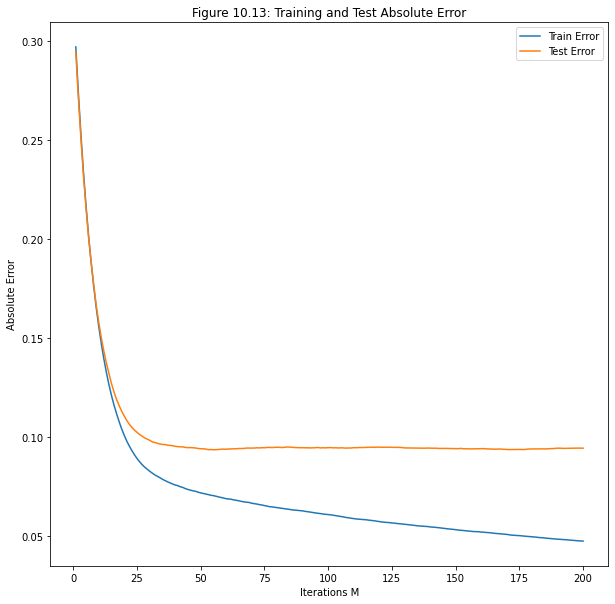

In [ ]:
# Plotting Training and Testing Absolute Error
plt.figure(1)
plt.figure(figsize=(10,10))
plt.plot(NE,MAE_vec_train)
plt.plot(NE,MAE_vec)

plt.title('Figure 10.13: Training and Test Absolute Error')
plt.xlabel('Iterations M')
plt.ylabel('Absolute Error')
plt.legend(['Train Error','Test Error'])
plt.show()

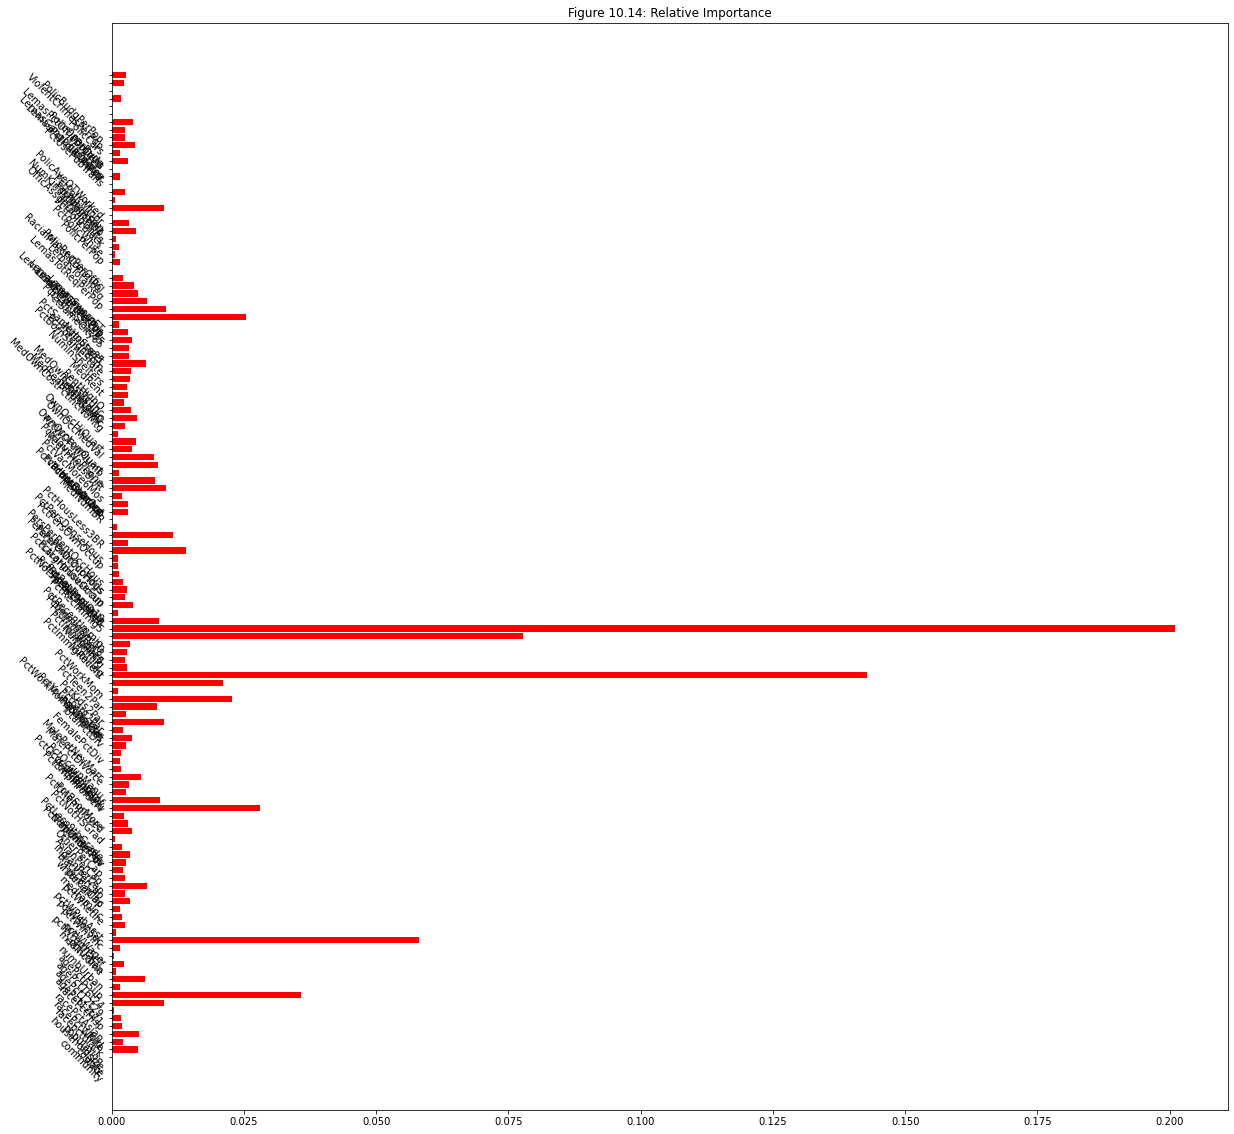

In [ ]:
# Plotting Relative Importance
plt.figure(figsize=(20,20))
plt.barh(crime_feature_names, xg_reg.feature_importances_[0:127], color = 'red')
plt.rc('ytick', labelsize=5) 
plt.yticks(rotation=-45)
plt.title('Figure 10.14: Relative Importance')
plt.show()

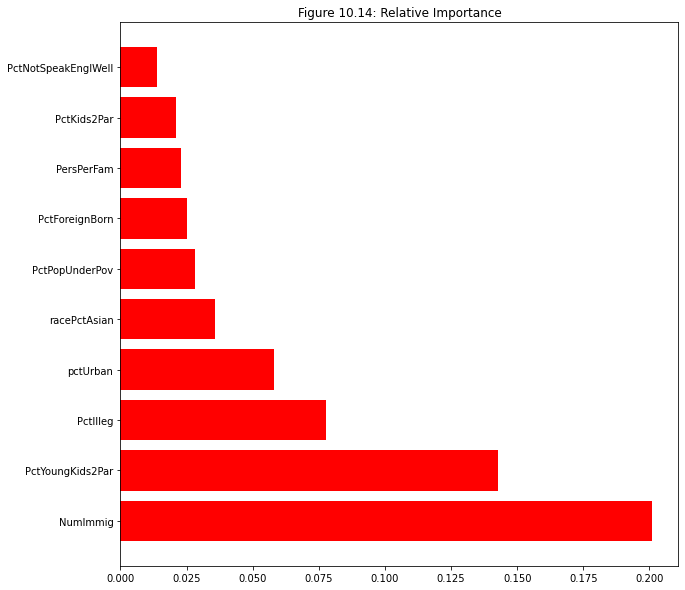

In [ ]:
# Plotting 10 Most Important Features
crime_feature_names = np.array(feature_names.columns)
sorted_feature_indices = np.argsort(xg_reg.feature_importances_) # Sort features from least to most important
sorted_feature_indices = sorted_feature_indices[::-1] # Reverse array order
# Get 10 most important features
sorted_feature_names = [''] * 10
for i in range(0,10):
  sorted_feature_names[i] = crime_feature_names[sorted_feature_indices[i]]

plt.figure(figsize=(10,10))
plt.barh(sorted_feature_names, xg_reg.feature_importances_[sorted_feature_indices[0:10]], color = 'red')
plt.rc('ytick', labelsize=10) 
plt.title('Figure 10.14: Relative Importance')
plt.show()

# Results for crime in communities dataset

The crime in communities dataset uses 127 features to predict the violent crimes per population. A gradient boosted tree model was used for training and testing. The results are summarized below.

The mean absolute error was 0.092 (9.2% error) which is better than the baseline which was 0.169 (16.9% error). Figure 10.13 shows the absolute error versus number of iterations (number of trees). The test error flattened out for large numbers of iterations, while training error continued decreasing. Figure 10.14 is first plotted with all of the features, but then replotted with only the 10 most important features. The most important feature for predicting violent crimes is the number of immigrants. The second most important feature is the percentage of kids living in 2 parent households. 
